In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/AmazonReview.csv')

In [ ]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
df.tail()

,Review,Sentiment
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5
24999,Awsome!!! I loved this little speaker. It has ...,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.isnull().sum()

Review       1
Sentiment    0
dtype: int64

In [ ]:
 df.dropna(inplace=True)

In [ ]:
#1,2,3->negative(i.e 0)
df.loc[df['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
df.loc[df['Sentiment']>3,'Sentiment'] = 1

In [ ]:
df.tail()

,Review,Sentiment
24995,These cables (lightning) are far superior to m...,1
24996,This unit performs exactly as advertised. I u...,1
24997,I had the key cut at a local hardware store cu...,1
24998,I love my case I ordered from amazon. It wasn'...,1
24999,Awsome!!! I loved this little speaker. It has ...,1


In [ ]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


In [ ]:
stop_words = set(stopwords.words('english'))
def clean_review(review):
  tokens = nltk.word_tokenize(review)
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
  return ' '.join(filtered_tokens)

In [ ]:
df['Review'] = df['Review'].apply(clean_review)

In [ ]:
print(df.head())
df.tail()

                                              Review  Sentiment
0  Fast shipping product cheaply made brought gra...          0
1  case takes long ship 's even worth DONT BUY ! ...          0
2  Good droids . good iPhones . use features watc...          0
3  cable compatible macbook iphone . Also connect...          0
4  case nice glow light . 'm disappointed product...          0


,Review,Sentiment
24995,cables ( lightning ) far superior cables marke...,1
24996,unit performs exactly advertised . use climbin...,1
24997,"key cut local hardware store cut free , progra...",1
24998,love case ordered amazon . n't color looked on...,1
24999,Awsome ! ! ! loved little speaker . great soun...,1


In [ ]:
df['Review'].head()[0]

'Fast shipping product cheaply made brought grandchild IPod would protected fell skin suitable protection . good decoration . Therefore rated it1 *'

In [ ]:
df['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

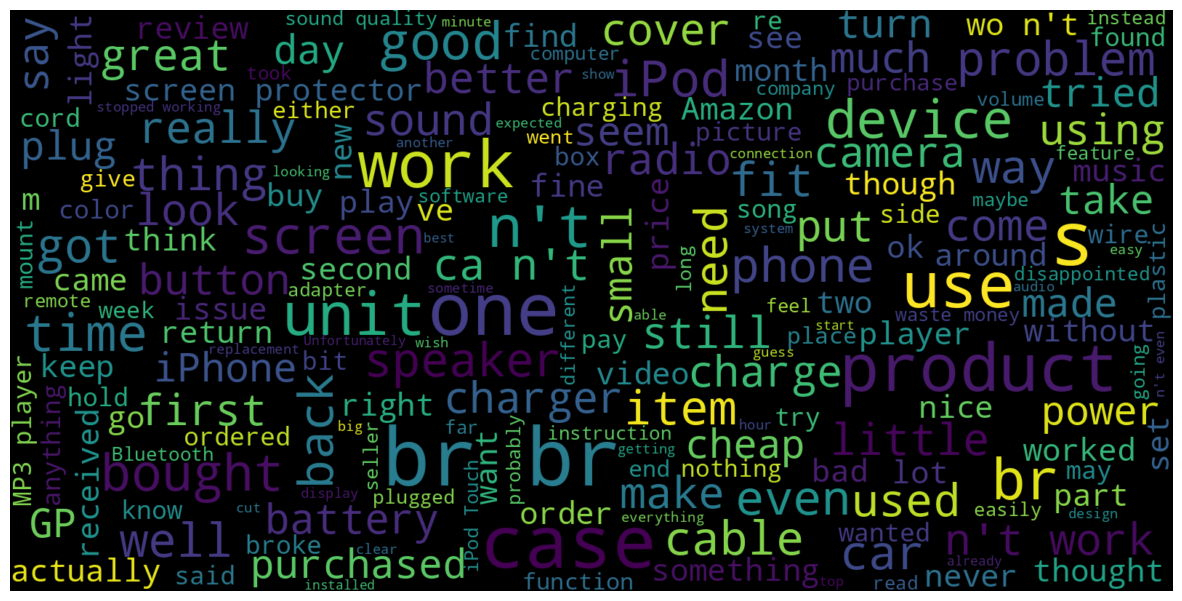

In [ ]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


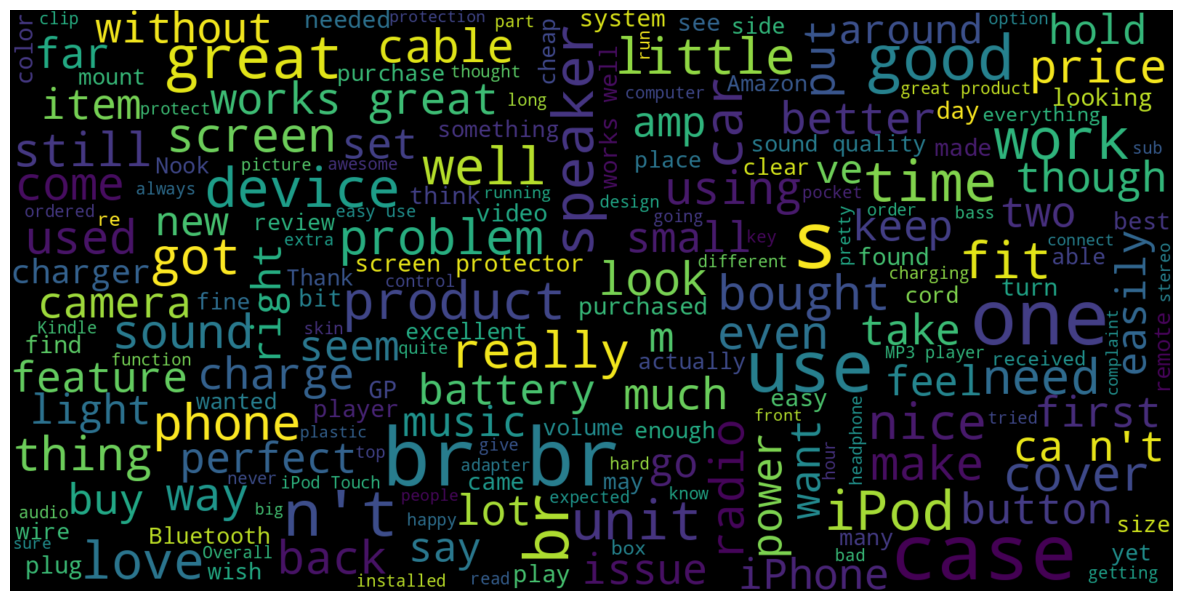

In [ ]:
consolidated=' '.join(word for word in df['Review'][df['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review'] ).toarray()


In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,df['Sentiment'],
												test_size=0.25 ,
												random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))


0.81072


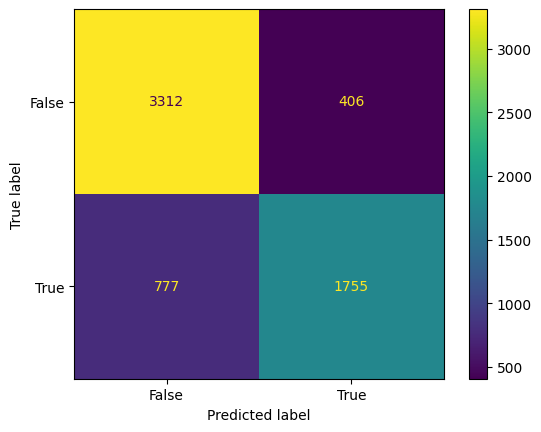

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()
